In [346]:
# Importing all the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Load the dataset
df = pd.read_csv('city_day.csv')

# Get a first look at the data
print("\nData Info:")
df.info()
df.head()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [347]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [348]:
# Checking for missing values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

# Data Cleaning

In [349]:
city_day = df.copy()

In [350]:
for col in city_day.columns:
  prop_missing = round((sum(pd.isna(city_day[col]))/len(city_day))*100,2)
  print (col,"has",prop_missing, "% missing values") 

City has 0.0 % missing values
Date has 0.0 % missing values
PM2.5 has 15.57 % missing values
PM10 has 37.72 % missing values
NO has 12.13 % missing values
NO2 has 12.14 % missing values
NOx has 14.17 % missing values
NH3 has 34.97 % missing values
CO has 6.97 % missing values
SO2 has 13.05 % missing values
O3 has 13.62 % missing values
Benzene has 19.04 % missing values
Toluene has 27.23 % missing values
Xylene has 61.32 % missing values
AQI has 15.85 % missing values
AQI_Bucket has 15.85 % missing values


In [351]:
# droping columns with more than 20 missing values
city_day = city_day.drop(columns=["PM10", "NH3", "Toluene", "Xylene"])


In [352]:
# 1. Converting 'Date' to datetime objects
city_day['Date'] = pd.to_datetime(city_day['Date'])

# 2. Forward-fill missing values within each city group
numeric_cols = city_day.select_dtypes(include= np.number).columns
city_day[numeric_cols] = city_day.groupby('City')[numeric_cols].ffill()

# 3. Defining the function for AQI Buckets
def get_aqi_bucket(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

# 4. Recalculating 'AQI_Bucket' based on the now-filled 'AQI' column for consistency
city_day['AQI_Bucket'] = city_day['AQI'].apply(get_aqi_bucket)


city_day.dropna(inplace=True)

print("Cleaned and Prepared DataFrame:")
df.info()


Cleaned and Prepared DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [353]:
# Checking for null values in cleaned data
city_day.isnull().sum()

City          0
Date          0
PM2.5         0
NO            0
NO2           0
NOx           0
CO            0
SO2           0
O3            0
Benzene       0
AQI           0
AQI_Bucket    0
dtype: int64

# Feature Engineering 

In [354]:
# Creating Year and Month columns 
city_day['Year'] = city_day['Date'].dt.year
city_day['Month'] = city_day['Date'].dt.month

print("\nCleaned Data Head:")
city_day.head()


Cleaned Data Head:


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI,AQI_Bucket,Year,Month
28,Ahmedabad,2015-01-29,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,209.0,Poor,2015,1
29,Ahmedabad,2015-01-30,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,328.0,Very Poor,2015,1
30,Ahmedabad,2015-01-31,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,514.0,Severe,2015,1
31,Ahmedabad,2015-02-01,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,782.0,Severe,2015,2
32,Ahmedabad,2015-02-02,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,914.0,Severe,2015,2


# Descriptive Analysis

In [355]:
descriptive_stats = city_day.describe().round(2)
descriptive_stats

,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI,Year,Month
count,24191,24191.00,24191.00,24191.00,24191.00,24191.00,24191.00,24191.00,24191.00,24191.00,24191.00,24191.00
mean,2018-06-15 09:31:44.989458688,71.00,18.22,29.85,32.37,2.56,15.14,34.78,3.52,176.13,2017.97,6.35
min,2015-01-01 00:00:00,0.04,0.02,0.02,0.00,0.00,0.01,0.01,0.00,13.00,2015.00,1.00
25%,2017-05-27 00:00:00,29.75,6.08,13.21,14.12,0.57,5.86,19.37,0.16,83.00,2017.00,3.00
50%,2018-09-15 00:00:00,50.85,10.32,23.13,23.92,0.94,9.47,31.32,1.19,124.00,2018.00,6.00
75%,2019-09-09 00:00:00,87.18,20.46,38.78,39.55,1.60,15.85,45.56,3.33,234.00,2019.00,9.00
max,2020-07-01 00:00:00,949.99,390.68,362.21,382.84,175.81,186.08,257.73,455.03,2049.00,2020.00,12.00
std,NaN,65.47,23.73,24.69,30.38,7.33,18.15,21.90,16.38,146.10,1.49,3.43


In [356]:
levels = ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"]
bucket_dict = dict()
for level in levels:
  max_AQI = max(city_day[city_day["AQI_Bucket"]==level]["AQI"])
  min_AQI = min(city_day[city_day["AQI_Bucket"]==level]["AQI"])

  bucket_dict[level] = [min_AQI, max_AQI]

for level in levels:
  print ("For level ", level,": AQI index range is", bucket_dict[level])

For level  Good : AQI index range is [13.0, 50.0]
For level  Satisfactory : AQI index range is [51.0, 100.0]
For level  Moderate : AQI index range is [101.0, 200.0]
For level  Poor : AQI index range is [201.0, 300.0]
For level  Very Poor : AQI index range is [301.0, 400.0]
For level  Severe : AQI index range is [401.0, 2049.0]


# Data Visualisation and Analysis

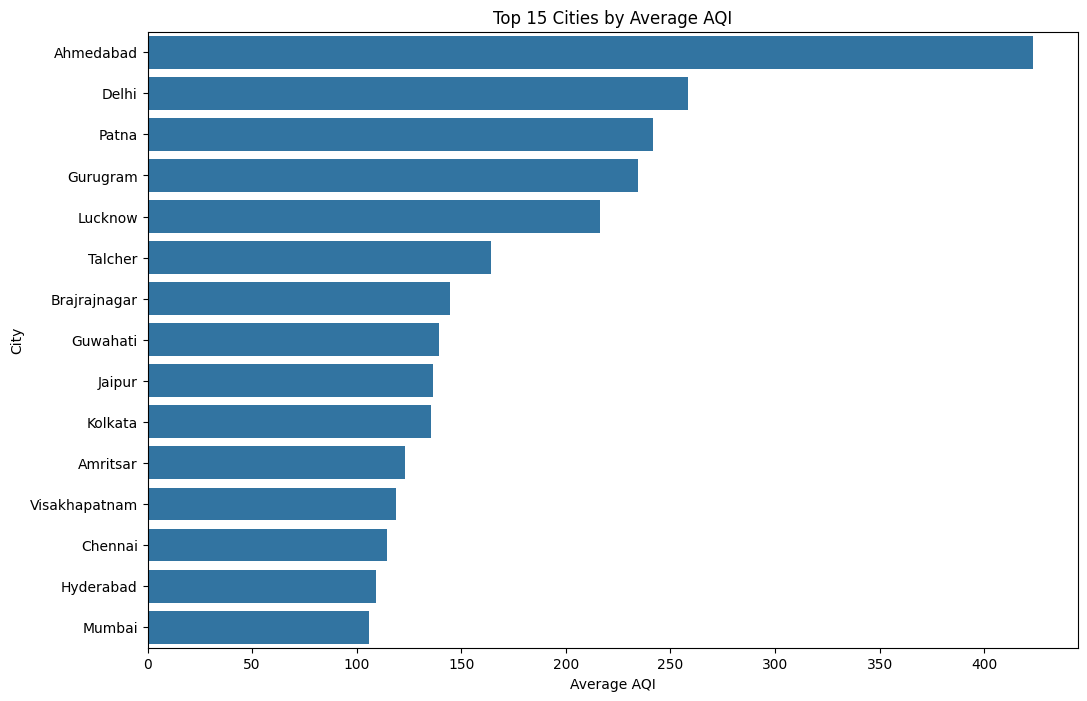

In [357]:
# Calculating the average AQI for each city
avg_aqi_by_city = city_day.groupby('City')['AQI'].mean().sort_values(ascending=False).reset_index()

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='AQI', y='City', data=avg_aqi_by_city.head(15)) # Top 15 cities
plt.title('Top 15 Cities by Average AQI')
plt.xlabel('Average AQI')
plt.ylabel('City')
plt.show()

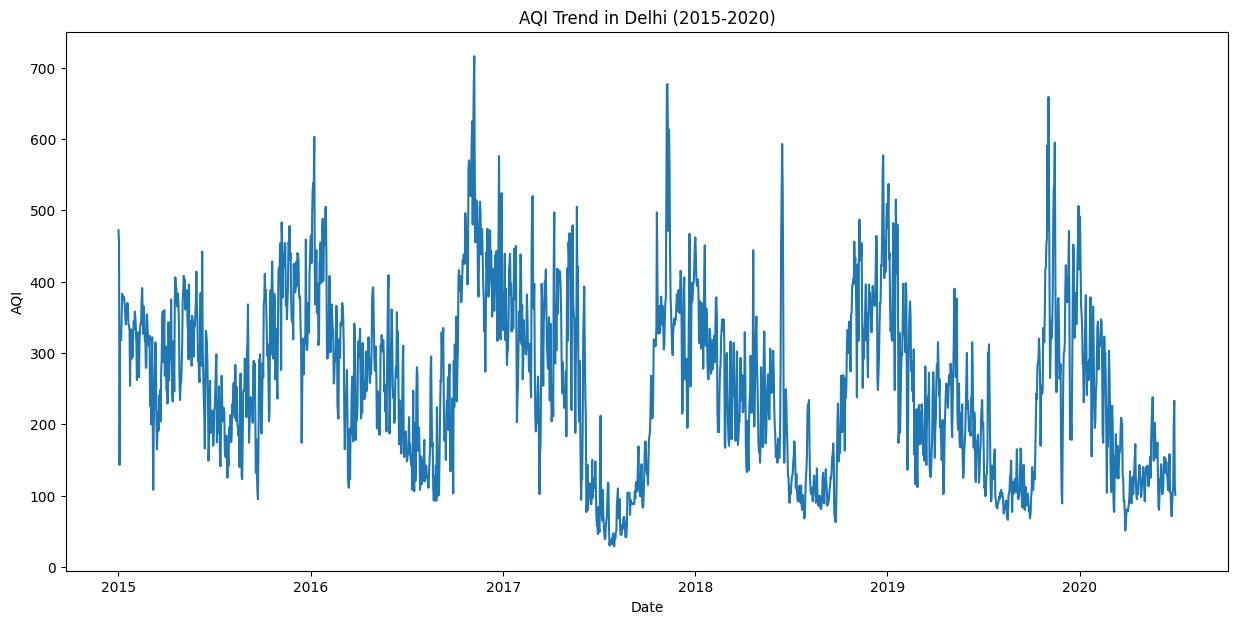

In [358]:
# Filtering data for a specific city
delhi_df = city_day[city_day['City'] == 'Delhi']

# Ploting the monthly average AQI over the years
plt.figure(figsize=(15, 7))
sns.lineplot(data=delhi_df, x='Date', y='AQI')
plt.title('AQI Trend in Delhi (2015-2020)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

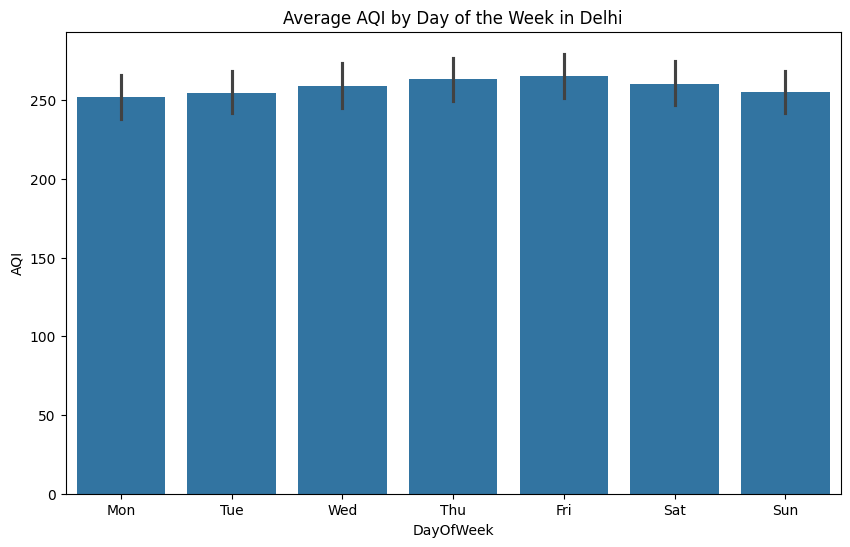

In [361]:
# Creating Day of Week feature (Monday=0, Sunday=6)
delhi_df['DayOfWeek'] = delhi_df['Date'].dt.dayofweek

# Ploting average AQI by day of the week for a city like Delhi
plt.figure(figsize=(10, 6))
sns.barplot(data=delhi_df, x='DayOfWeek', y='AQI')
plt.title('Average AQI by Day of the Week in Delhi')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

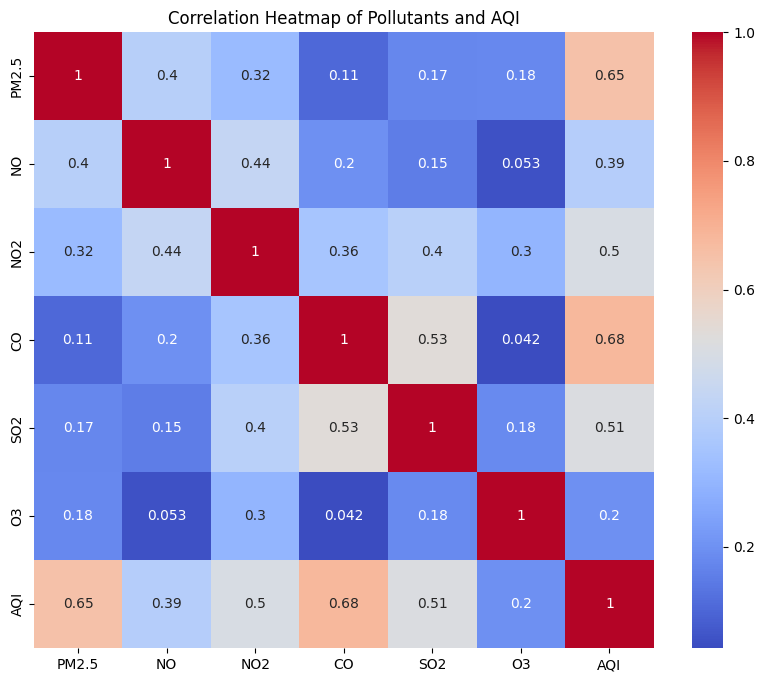

In [ ]:
# Selecting only pollutant columns and AQI
pollutants_df = city_day[['PM2.5', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'AQI']]

# Creating a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pollutants_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Pollutants and AQI')
plt.show()

# Machine Learning Models

In [ ]:
# Selecting data for one city, e.g., Delhi
forecast_df = city_day[city_day['City'] == 'Delhi'][['Date', 'AQI']].copy()
forecast_df.set_index('Date', inplace=True)
forecast_df.sort_index(inplace=True)

# Creating lag features (for using past values to predict the future)
# We'll use the last 3 days' AQI to predict today's AQI
for i in range(1, 10):
    forecast_df[f'AQI_lag_{i}'] = forecast_df['AQI'].shift(i)

# Droping rows with missing lag values
forecast_df.dropna(inplace=True)

# Adding time-based features
forecast_df['Month'] = forecast_df.index.month
forecast_df['DayOfWeek'] = forecast_df.index.dayofweek
forecast_df.head()

,AQI,AQI_lag_1,AQI_lag_2,AQI_lag_3,AQI_lag_4,AQI_lag_5,AQI_lag_6,AQI_lag_7,AQI_lag_8,AQI_lag_9,Month,DayOfWeek
Date,,,,,,,,,,,,
2015-01-10,376.0,375.0,383.0,353.0,318.0,325.0,319.0,143.0,454.0,472.0,1,5
2015-01-11,379.0,376.0,375.0,383.0,353.0,318.0,325.0,319.0,143.0,454.0,1,6
2015-01-12,375.0,379.0,376.0,375.0,383.0,353.0,318.0,325.0,319.0,143.0,1,0
2015-01-13,366.0,375.0,379.0,376.0,375.0,383.0,353.0,318.0,325.0,319.0,1,1
2015-01-14,353.0,366.0,375.0,379.0,376.0,375.0,383.0,353.0,318.0,325.0,1,2


In [ ]:
# Defining features (X) and target (y)
X = forecast_df.drop('AQI', axis=1)
y = forecast_df['AQI']

# Spliting the data, e.g., use data before 2020 to train
X_train = X[X.index < '2020-01-01']
X_test = X[X.index >= '2020-01-01']
y_train = y[y.index < '2020-01-01']
y_test = y[y.index >= '2020-01-01']

In [ ]:
# Building and Training the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
print("Linear Regression model has been successfully trained.\n")

# Making predictions on the test set
predictions = model.predict(X_test)
print("Evaluating Model Performance \n")

# Evaluating the model
mae = metrics.mean_absolute_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('Mean Absolute Error (MAE):', round(mae,2))
print('Model Root Mean Squared Error (RMSE):', round(rmse,2))


Linear Regression model has been successfully trained.

Evaluating Model Performance 

Mean Absolute Error (MAE): 28.3
Model Root Mean Squared Error (RMSE): 36.98


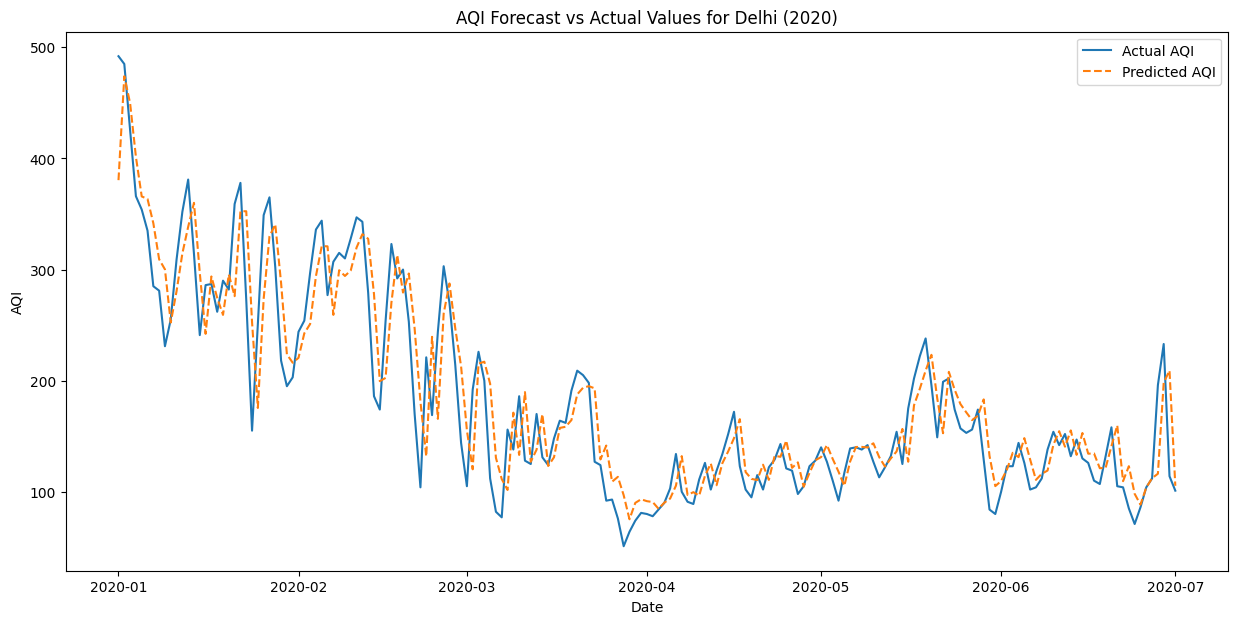

In [ ]:
# Ploting the predictions
plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test, label='Actual AQI')
plt.plot(y_test.index, predictions, label='Predicted AQI', linestyle='--')
plt.title('AQI Forecast vs Actual Values for Delhi (2020)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [ ]:
# Training and Evaluating the Random Forest Model 
model = RandomForestRegressor( random_state=42)
model.fit(X_train, y_train)
print("Random Forest model has been successfully trained.\n")

predictions = model.predict(X_test)

print("Evaluating Model Performance \n")
mae = metrics.mean_absolute_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('Mean Absolute Error (MAE):', round(mae,2))
print('Model Root Mean Squared Error (RMSE):', round(rmse,2))


Random Forest model has been successfully trained.

Evaluating Model Performance 

Mean Absolute Error (MAE): 29.79
Model Root Mean Squared Error (RMSE): 40.48


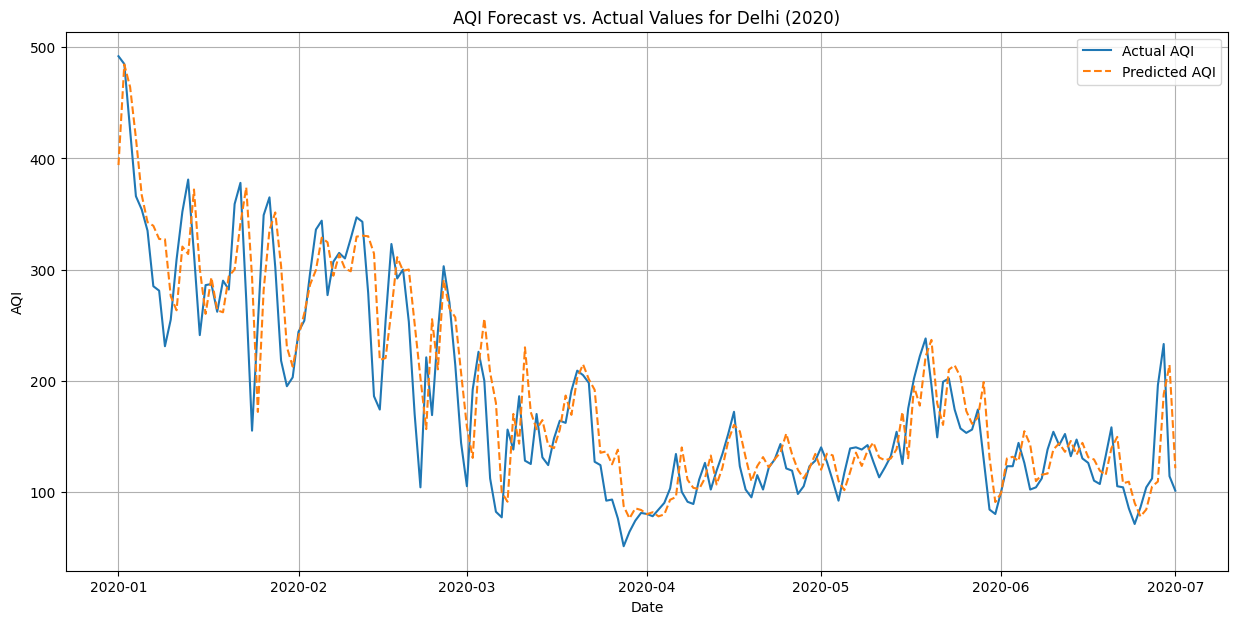

In [ ]:
# Ploting the predictions
plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test, label='Actual AQI')
plt.plot(y_test.index, predictions, label='Predicted AQI', linestyle='--')
plt.title('AQI Forecast vs. Actual Values for Delhi (2020)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

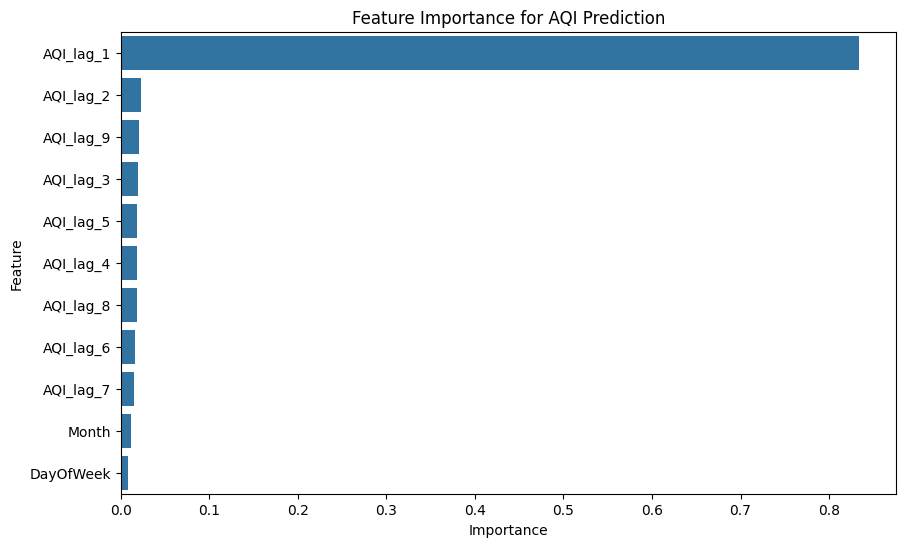

In [ ]:
# Showing Feature Importance in Random Forest Model

# Geting the importance of each feature
importances = model.feature_importances_

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Ploting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for AQI Prediction')
plt.show()